In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (12, 8)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [4]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,NaN,NaN,2.152500,0.000000,NaN,48.000000,67.000000,2.000000
50%,38.200000,NaN,NaN,2.895000,0.000000,NaN,50.000000,74.000000,2.000000
75%,60.730000,NaN,NaN,3.582500,1.000000,NaN,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [15]:
test.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
count,87395.000000,83429.000000,74068.000000,87395.000000,87395.000000,40606.000000,87395.000000,87395.000000
mean,44.095174,5.990051,2.803392,2.847389,0.783031,63.936610,51.162160,75.015699
std,25.483993,3.626861,0.227113,0.981744,1.034266,21.636247,4.956831,11.582761
min,1.550000,0.000000,1.317850,0.001250,0.000000,30.000000,41.000000,52.000000
25%,24.540000,NaN,NaN,2.152500,0.000000,NaN,48.000000,67.000000
50%,38.060000,NaN,NaN,2.895000,0.000000,NaN,50.000000,73.000000
75%,60.690000,NaN,NaN,3.580000,1.000000,NaN,54.000000,82.000000
max,109.230000,10.000000,4.871920,5.000000,8.000000,178.000000,116.000000,169.000000


In [16]:
train.dtypes
test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [35]:
train = train.rename(columns={'Trip_Distance':'TD','Type_of_Cab':'TOC','Customer_Since_Months':'CSM','Life_Style_Index':'LSI','Confidence_Life_Style_Index':'CLSI','Destination_Type':'DT','Customer_Rating':'CR','Cancellation_Last_1Month':'CLM','Surge_Pricing_Type':'y'})

In [36]:
test = test.rename(columns={'Trip_Distance':'TD','Type_of_Cab':'TOC','Customer_Since_Months':'CSM','Life_Style_Index':'LSI','Confidence_Life_Style_Index':'CLSI','Destination_Type':'DT','Customer_Rating':'CR','Cancellation_Last_1Month':'CLM'})

In [12]:
train.to_csv('train1.csv',index=False)
test.to_csv('test1.csv',index=False)

In [17]:
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

C:\Users\hp pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [92]:
train.isnull().sum()

Trip_ID        0
TD             0
TOC        20210
CSM            0
LSI            0
CLSI           0
DT             0
CR             0
CLM            0
Var1       71030
Var2           0
Var3           0
Gender         0
y              0
dtype: int64

In [93]:
test.isnull().sum()

Trip_ID        0
TD             0
TOC        13158
CSM            0
LSI            0
CLSI           0
DT             0
CR             0
CLM            0
Var1       46789
Var2           0
Var3           0
Gender         0
dtype: int64

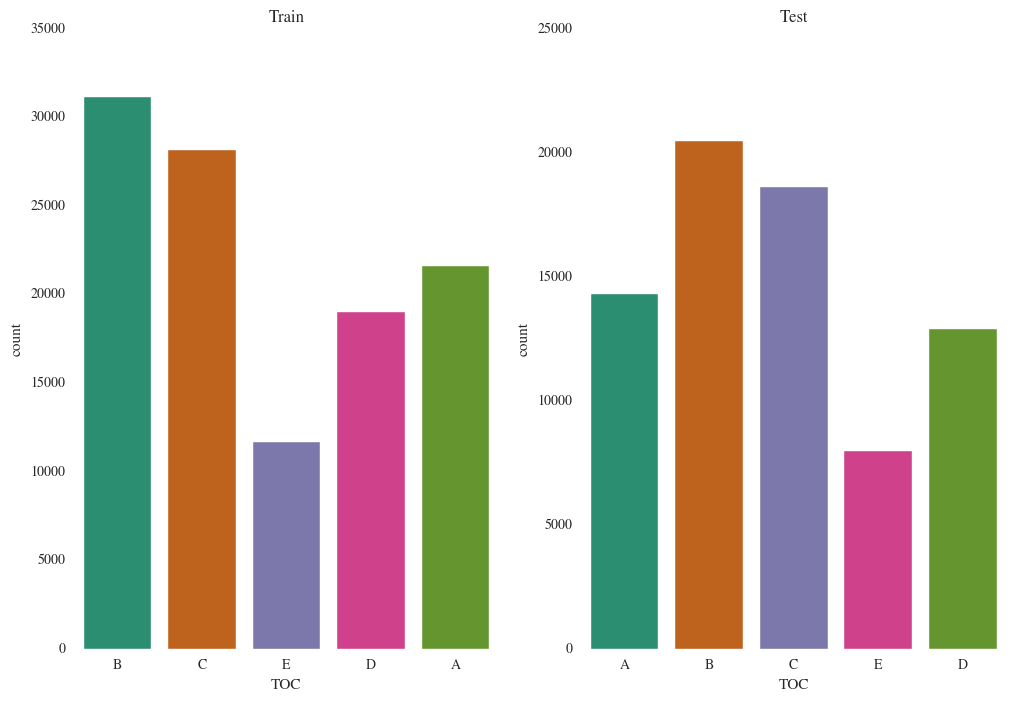

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("TOC",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("TOC",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

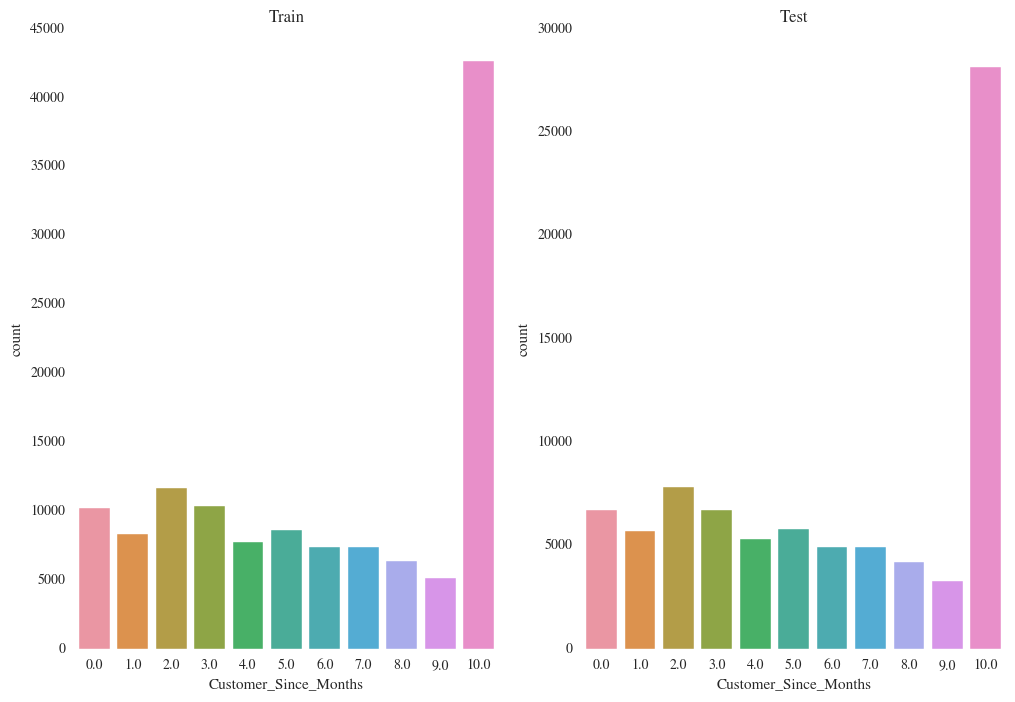

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Customer_Since_Months",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Customer_Since_Months",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

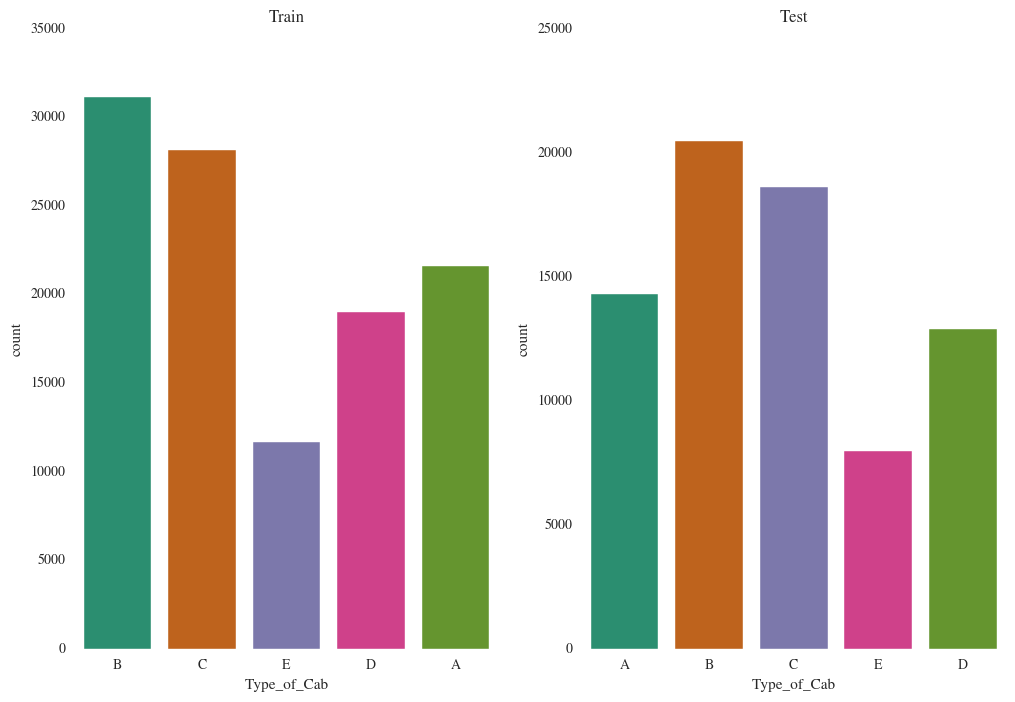

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Type_of_Cab",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Type_of_Cab",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)


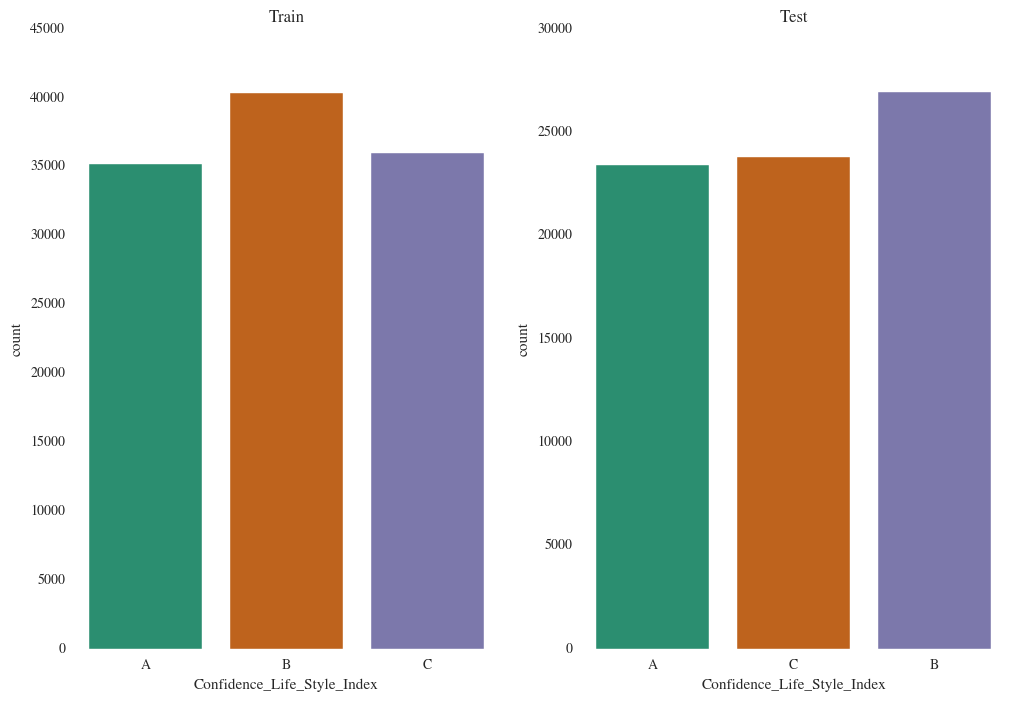

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Confidence_Life_Style_Index",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Confidence_Life_Style_Index",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

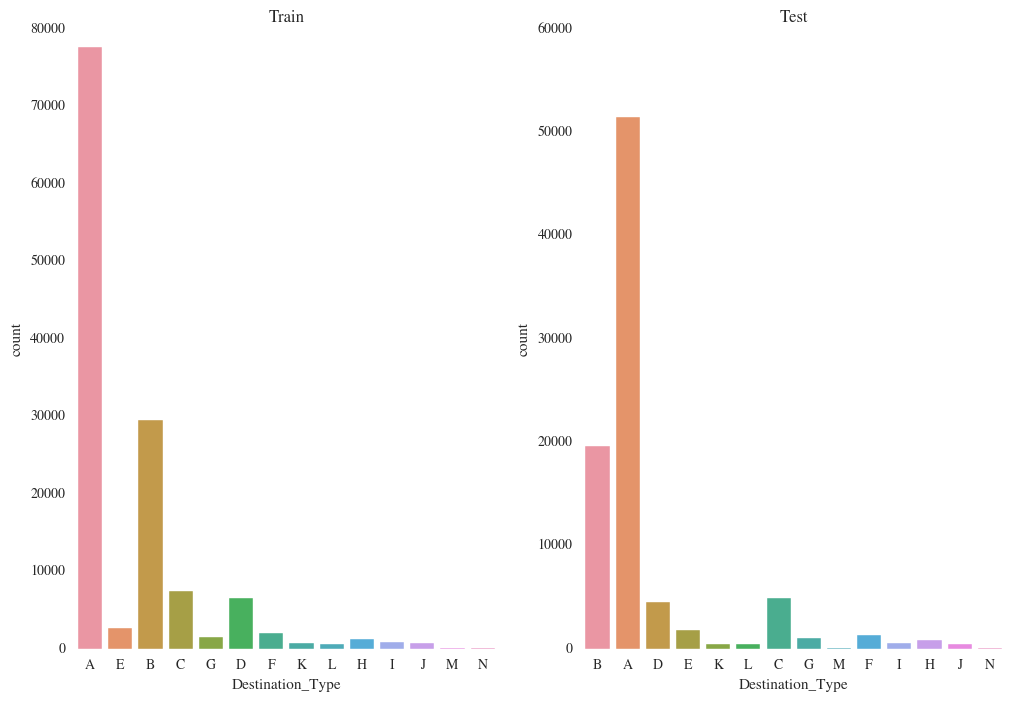

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Destination_Type",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Destination_Type",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

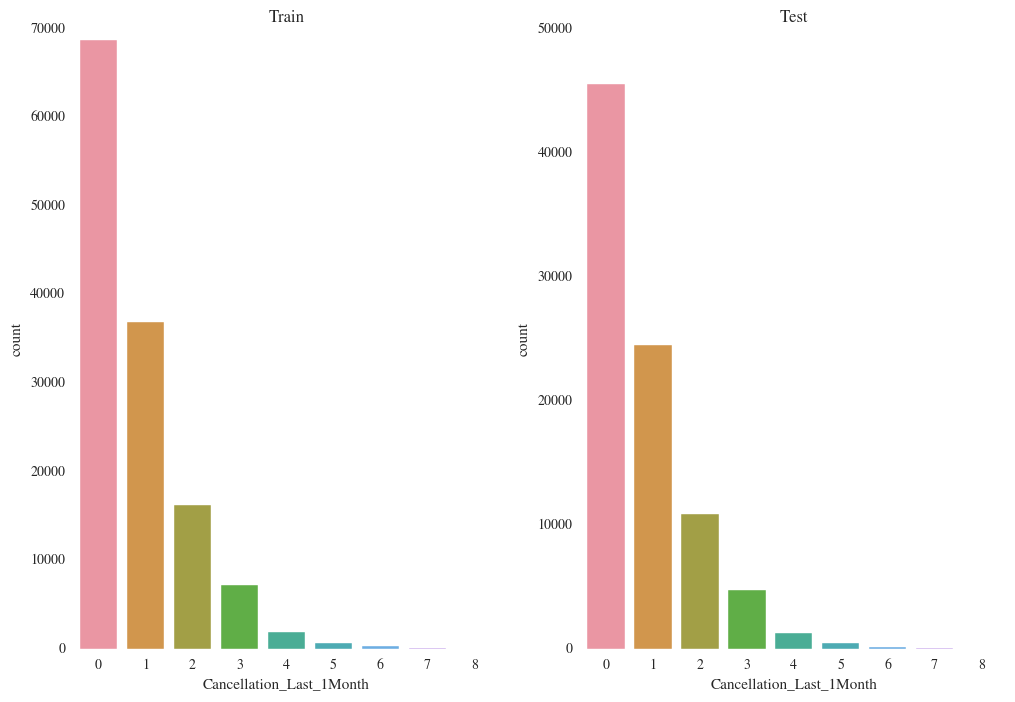

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Cancellation_Last_1Month",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Cancellation_Last_1Month",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

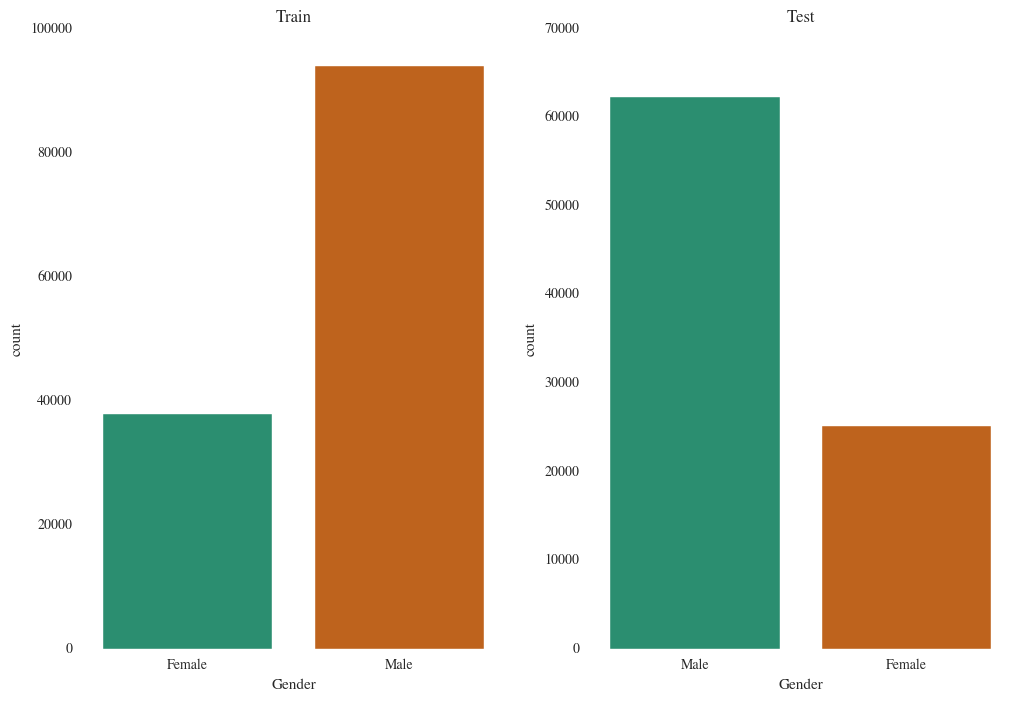

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot("Gender",data=train,ax=ax1)
ax1.set_title('Train')
sns.countplot("Gender",data=test,ax=ax2)
ax2.set_title('Test')
#sns.countplot("Campaign",data=data)

In [81]:
train.groupby('DT').agg(['count','mean','median'])

TD                       CSM                     LSI            \
    count       mean  median  count      mean median  count      mean   
DT                                                                      
A   77597  46.635770  42.800  74441  6.108610    7.0  65612  2.802360   
B   29555  45.517439  39.990  28074  5.943293    6.0  25057  2.800238   
C    7484  42.962588  36.100   7035  6.564179    7.0   6364  2.871486   
D    6588  29.641900  23.130   6206  5.805511    6.0   5601  2.754494   
E    2717  32.003544  24.580   2588  5.382148    5.0   2295  2.789105   
F    1950  46.445538  38.910   1906  5.407135    5.0   1644  2.846214   
G    1489  25.405561  20.290   1420  5.192958    5.0   1259  2.739560   
H    1260  27.206849  20.475   1183  5.793745    6.0   1055  2.780245   
I     813  22.498647  16.670    771  4.172503    3.0    691  2.745843   
J     695  19.405079  14.960    648  6.114198    6.0    580  2.747457   
K     680  32.805941  29.105    671  4.356185    4.0    587  2.781620   
L     643  46.542830  41.270    617  5.419773    5.0    559  2.812683   
M      93  34.750860  30.730     87  6.298851    7.0     77  2.879111   
N      98  18.638776  16.550     95  3.147368    2.0     88  2.580364   

                 CR                        CLM                    Var1  \
      median  count      mean    median  count      mean median  count   
DT                                                                       
A   2.797845  77597  2.763357  2.806250  77597  0.769437      0  36510   
B   2.797250  29555  2.808892  2.862500  29555  0.703570      0  12461   
C   2.863345   7484  3.193129  3.282500   7484  0.996392      1   3893   
D   2.747360   6588  3.042561  3.101250   6588  0.824529      1   3128   
E   2.790740   2717  3.295332  3.412500   2717  0.909091      1   1202   
F   2.843250   1950  3.296251  3.366875   1950  1.023590      1    886   
G   2.739190   1489  3.382707  3.513750   1489  0.822028      0    600   
H   2.779390   1260  2.979029  3.033750   1260  0.811111      0    603   
I   2.731690    813  3.128407  3.226250    813  0.886839      1    364   
J   2.738865    695  3.012800  3.088750    695  0.817266      1    323   
K   2.780960    680  3.226469  3.251250    680  0.947059      1    281   
L   2.814760    643  3.312832  3.400000    643  1.332815      1    298   
M   2.875690     93  3.228696  3.232500     93  0.924731      1     43   
N   2.575790     98  3.523622  3.567500     98  0.948980      1     40   

                       Var2                     Var3                        y  \
         mean median  count       mean median  count       mean median  count   
DT                                                                              
A   64.132786   61.0  77597  51.447298     51  77597  75.615256     74  77597   
B   64.622582   62.0  29555  51.480494     51  29555  75.136999     73  29555   
C   63.192140   60.0   7484  50.656066     50   7484  75.787948     74   7484   
D   64.518862   62.0   6588  49.910595     49   6588  72.481937     71   6588   
E   64.230449   61.0   2717  49.722488     49   2717  72.172617     70   2717   
F   62.401806   59.0   1950  49.873333     49   1950  72.702564     71   1950   
G   65.930000   63.0   1489  49.211551     48   1489  71.384150     70   1489   
H   63.718076   60.0   1260  50.372222     50   1260  74.159524     73   1260   
I   64.357143   60.0    813  49.678967     49    813  71.311193     70    813   
J   65.498452   63.0    695  49.828777     49    695  72.490647     71    695   
K   65.925267   62.0    680  50.004412     49    680  70.458824     69    680   
L   65.392617   62.0    643  50.132193     49    643  73.816485     72    643   
M   65.395349   62.0     93  50.720430     50     93  72.967742     73     93   
N   57.175000   59.5     98  49.091837     49     98  68.102041     66     98   

                     
        mean median  
DT                   
A   2.208513      2  
B   1.963458      2  
C   2.111571      

In [85]:
train.groupby('CSM').agg(['count','mean','median'])

TD                       LSI                         CR            \
      count       mean  median  count      mean    median  count      mean   
CSM                                                                          
0.0   10169  40.442442  35.390   8636  2.761562  2.754160  10169  2.938305   
1.0    8297  40.975485  35.430   7040  2.772759  2.771065   8297  2.923747   
2.0   11621  41.851607  36.340   9850  2.783360  2.777160  11621  2.900874   
3.0   10351  42.017699  36.740   8762  2.790280  2.779470  10351  2.904038   
4.0    7726  41.965415  36.480   6549  2.788347  2.778900   7726  2.900602   
5.0    8641  42.751970  37.120   7286  2.795038  2.782040   8641  2.877746   
6.0    7375  43.617394  37.830   6227  2.802500  2.794890   7375  2.851551   
7.0    7407  44.857995  40.140   6273  2.808146  2.795040   7407  2.832913   
8.0    6328  44.834739  39.715   5341  2.808360  2.800660   6328  2.819887   
9.0    5147  45.269817  40.870   4355  2.812537  2.807620   5147  2.788672   
10.0  48600  46.970381  43.575  41150  2.823072  2.822070  48600  2.793598   

                 CLM                    Var1                     Var2  \
       median  count      mean median  count       mean median  count   
CSM                                                                     
0.0   3.00375  10169  0.781788      0   4285  64.008868   61.0  10169   
1.0   2.97375   8297  0.796071      0   3506  63.002282   59.0   8297   
2.0   2.96125  11621  0.794080      0   5140  63.725681   60.0  11621   
3.0   2.93875  10351  0.797024      0   4643  63.961017   61.0  10351   
4.0   2.94875   7726  0.774528      0   3381  65.345460   64.0   7726   
5.0   2.91250   8641  0.794005      0   3817  65.834425   64.0   8641   
6.0   2.89375   7375  0.800542      0   3246  66.443315   64.0   7375   
7.0   2.88375   7407  0.797624      0   3319  65.514613   62.0   7407   
8.0   2.87125   6328  0.779393      0   2862  64.502446   61.0   6328   
9.0   2.84375   5147  0.774820      0   2384  63.585151   61.0   5147   
10.0  2.83375  48600  0.770782      0  24049  63.683272   60.0  48600   

                         Var3                        y                   
           mean median  count       mean median  count      mean median  
CSM                                                                      
0.0   50.939915     50  10169  73.615695     72  10169  2.117514      2  
1.0   51.013860     50   8297  73.713511     72   8297  2.127034      2  
2.0   51.093452     50  11621  73.983048     72  11621  2.138714      2  
3.0   51.089750     50  10351  73.984832     72  10351  2.125012      2  
4.0   51.076236     50   7726  73.923634     72   7726  2.136940      2  
5.0   51.086101     50   8641  74.074760     72   8641  2.149751      2  
6.0   51.113356     50   7375  74.304814     73   7375  2.169085      2  
7.0   51.256109     50   7407  74.737141     73   7407  2.176320      2  
8.0   51.272282     51   6328  74.876264     73   6328  2.153603      2  
9.0   51.282495     50   5147  75.128230     73   5147  2.180299      2  
10.0  51.369115     51  48600  76.720617     75  48600  2.175844      2

In [83]:
train['CSM'].fillna(10,inplace=True)

In [84]:
test['CSM'].fillna(10,inplace=True)

In [88]:
train['LSI'].fillna(2.8,inplace=True)
test['LSI'].fillna(2.8,inplace=True)

In [152]:
train['Var1'].fillna(64,inplace=True)
test['Var1'].fillna(64,inplace=True)

In [91]:
train['CLSI'].fillna('D',inplace=True)
test['CLSI'].fillna('D',inplace=True)

In [94]:
train['TOC'][(train['TOC'].isnull()==True)&(train['CLM']==1)] = 'E'
test['TOC'][(test['TOC'].isnull()==True)&(test['CLM']==1)] = 'E'

In [167]:
train['TOC'].fillna('B',inplace=True)

In [168]:
test['TOC'].fillna('B',inplace=True)

In [111]:
train['log_var2'] = np.log(1+train["Var2"])
test['log_var2'] = np.log(1+test["Var2"])
train['log_var3'] = np.log(1+train["Var3"])
test['log_var3'] = np.log(1+test["Var3"])

In [112]:
del train['Var2']
del train['Var3']
del test['Var2']
del test['Var3']

In [201]:
dtr = train
dt = test

In [202]:
y = train['y']

In [203]:
a =  pd.get_dummies(dtr['Gender'])
b =  pd.get_dummies(dtr['DT'])
c =  pd.get_dummies(dtr['CLSI'],prefix='CLSI')
d =  pd.get_dummies(dt['CLSI'],prefix='CLSI')
e =  pd.get_dummies(dt['Gender'])
f =  pd.get_dummies(dt['DT'])

In [204]:
dtr= pd.concat([dtr,a,b,c],axis=1)
dtr.head()

,Trip_ID,TD,TOC,CSM,LSI,CLSI,DT,CR,CLM,Var1,Gender,y,log_var2,log_var3,Female,Male,A,B,C,D,E,F,G,H,I,J,K,L,M,N,CLSI_A,CLSI_B,CLSI_C,CLSI_D
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,Female,2,3.850148,4.110874,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,Male,2,4.043051,4.369448,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,T0005689464,41.58,B,10.0,2.80000,D,E,3.50125,2,64.0,Male,2,4.043051,4.356709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,T0005689465,61.56,C,10.0,2.80000,D,A,3.45375,0,64.0,Male,3,3.970292,4.317488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,Male,2,3.912023,4.634729,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [205]:
dt= pd.concat([dt,e,f,d],axis=1)
dt.head()

,Trip_ID,TD,TOC,CSM,LSI,CLSI,DT,CR,CLM,Var1,Gender,log_var2,log_var3,Female,Male,A,B,C,D,E,F,G,H,I,J,K,L,M,N,CLSI_A,CLSI_B,CLSI_C,CLSI_D
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,64.0,Male,3.850148,4.158883,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,Female,3.912023,4.394449,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,64.0,Male,3.871201,4.317488,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,T0005689466,14.94,B,6.0,2.48159,C,E,4.53000,0,63.0,Male,3.784190,4.007333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,Male,3.806662,4.043051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [206]:
del dtr['DT']
del dt['DT']
del dtr['CLSI']
del dt['CLSI']
del dtr['Female']
del dt['Female']
del dtr['Gender']
del dt['Gender']

In [207]:
dtr['C'] = dtr['C'] + dtr['D']
del dtr['D']
dt['C'] = dt['C'] + dt['D']
del dt['D']
dtr['E'] = dtr['E'] + dtr['F']+dtr['G'] + dtr['H']+dtr['I'] + dtr['J']+dtr['K'] + dtr['L']+dtr['M'] + dtr['N']
dt['E'] = dt['E'] + dt['F']+dt['G'] + dt['H']+dt['I'] + dt['J']+dt['K'] + dt['L']+dt['M'] + dt['N']
del dtr['F']
del dt['F']
del dtr['G']
del dt['G']
del dtr['H']
del dt['H']
del dtr['I']
del dt['I']
del dtr['J']
del dt['J']
del dtr['K']
del dt['K']
del dtr['L']
del dt['L']
del dtr['M']
del dt['M']
del dtr['N']
del dt['N']


In [208]:
dtr['TOC'] = dtr['TOC'].map({'A':1,'B':2,'C':3,'D':4,'E':5})
dt['TOC'] = dt['TOC'].map({'A':1,'B':2,'C':3,'D':4,'E':5})

In [209]:
dtr.head()

,Trip_ID,TD,TOC,CSM,LSI,CR,CLM,Var1,y,log_var2,log_var3,Male,A,B,C,E,CLSI_A,CLSI_B,CLSI_C,CLSI_D
0,T0005689460,6.77,2,1.0,2.42769,3.90500,0,40.0,2,3.850148,4.110874,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,T0005689461,29.47,2,10.0,2.78245,3.45000,0,38.0,2,4.043051,4.369448,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,T0005689464,41.58,2,10.0,2.80000,3.50125,2,64.0,2,4.043051,4.356709,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,T0005689465,61.56,3,10.0,2.80000,3.45375,0,64.0,3,3.970292,4.317488,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,T0005689467,54.95,3,10.0,3.03453,3.40250,4,51.0,2,3.912023,4.634729,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [210]:
xgb = XGBClassifier(n_estimators=200, objective='multi:softmax', silent=False)
xgb.fit(dtr.drop(['Trip_ID','y'],axis=1),y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [211]:
# cross_val_score(xgb,dtr.drop(['Trip_ID','y'],axis=1),y,cv=5,scoring='accuracy')

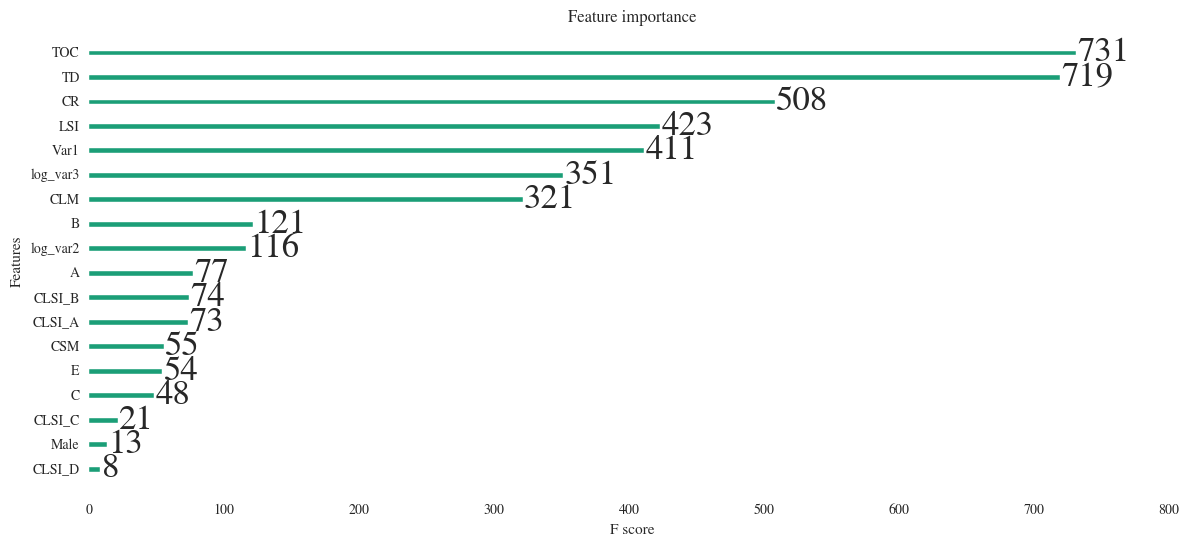

In [212]:
from xgboost import plot_importance
rcParams['figure.figsize'] = (14, 6)
plot_importance(xgb)

In [213]:
pred = xgb.predict(dt.drop(['Trip_ID'],axis=1))

In [214]:
pr = pd.DataFrame({'Surge_Pricing_Type':pred},index=dt['Trip_ID'])
pr.to_csv('solution1.csv')